## **Configs**

In [816]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config IPCompleter.greedy = True
!pwd

/content


## **Import libraries**

In [817]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Load training and test data**

In [818]:
train_file = "/content/sample_data/Titanic/train.csv"

train_data = pd.read_csv(train_file)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [819]:
test_file = "/content/sample_data/Titanic/test.csv"

test_data = pd.read_csv(test_file)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [820]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_all = concat_df(train_data, test_data)
dfs = [train_data, test_data]

## **2. Data analysis / cleanup / wrangling**

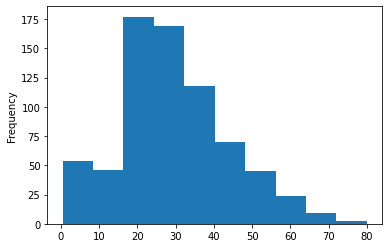

In [821]:
train_data['Age'].plot(kind='hist')

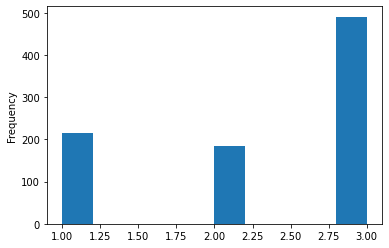

In [822]:
train_data['Pclass'].plot(kind='hist')

In [823]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [824]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [825]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,1601,G6,S
freq,1,577,7,4,644


In [826]:
print("Missings in the train data:")
display(train_data.isnull().sum())
print("------------------------------")
print("Missings in the test data:")
display(test_data.isnull().sum())

Missings in the train data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

------------------------------
Missings in the test data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### **2.1 Age**

In [827]:
print('Median for Age seperated by Pclass:')
display(train_data.groupby('Pclass')['Age'].median())
print('Median for Age seperated by Pclass and Sex:')
display(train_data.groupby(['Pclass','Sex'])['Age'].median())
print('Number of cases:')
display(train_data.groupby(['Pclass','Sex'])['Age'].count())

Median for Age seperated by Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age seperated by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [828]:
#replace the missings values with the medians of each group
df_all['Age'] = df_all.groupby(['Pclass' , 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

### **2.2 Fare**

In [829]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [830]:
#loc cases which are similiar to Mr. Thomas and use the median of fare to replace the missing for his data set
mr_thomas = df_all.loc[(df_all['Pclass'] == 3) & (df_all['SibSp'] == 0) & (df_all['Embarked'] == 'S')]['Fare'].median()
print(mr_thomas)

df_all.loc[df_all['Fare'].isnull(), 'Fare'] = mr_thomas

7.925


### **2.3 Cabin**

In [831]:
display(train_data['Cabin'].unique())
print("There are " + str(train_data['Cabin'].nunique()) + " different values for Cabin and " + str(train_data['Cabin'].isnull().sum()) + " cases are missing.")

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabin and 687 cases are missing.


Text(0.5, 0.98, 'Surivva1 rates for different cabines')

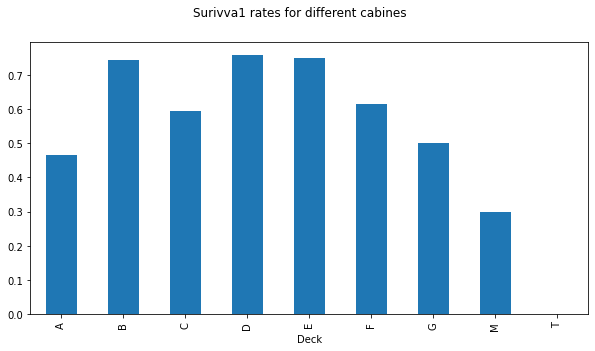

In [832]:
#keep all first letters of cabin in a new variable and use "M" for each missing

df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar', figsize=(10,5))
plt.suptitle('Surivva1 rates for different cabines')

In [833]:
idx = df_all[df_all['Deck'] == 'T'].index

df_all.loc[idx, 'Deck'] = 'A'

df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')
df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

### **2.4 Embarked**

In [834]:
df_all.loc[df_all['Embarked'].isnull()]

#check for passengers who were in passenger class 1. on deck abc and paid 88 or less for the tickets
df_all.loc[(df_all['Pclass'] == 1) & (df_all['Fare'] <= 86) & (df_all['Deck'] == 'ABC')]['Embarked'].value_counts()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


S    57
C    45
Name: Embarked, dtype: int64

In [835]:
df_all.loc[df_all['Embarked'].isnull(), 'Embarked'] = 'S'

### **2.5 Conclusion**

In [836]:
print("Missings in the data:")
display(df_all.isnull().sum())

Missings in the data:


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

## **3. Feature engineering**

### **3.1 Binning**

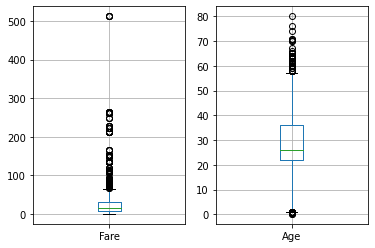

In [837]:
fig, axs = plt.subplots(1,2)

df_all.boxplot(ax=axs[0], column=['Fare'], figsize=(15,7))
df_all.boxplot(ax=axs[1], column=['Age'], figsize=(15,7))

In [838]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 5)
df_all['Age'] = pd.cut(df_all['Age'].astype(int), 5)

print("For age, each category has a different number of cases:")
display(df_all['Age'].value_counts())

print("For fare, each category has nearly a same number of cases:")
display(df_all['Fare'].value_counts())

display(df_all[['Age','Survived']].groupby('Age')['Survived'].mean())

display(df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean())

For age, each category has a different number of cases:


(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age, dtype: int64

For fare, each category has nearly a same number of cases:


(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       255
(7.854, 10.5]        255
Name: Fare, dtype: int64

Age
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.558]       0.426901
(21.558, 41.579]     0.443243
(41.579, 512.329]    0.645349
Name: Survived, dtype: float64

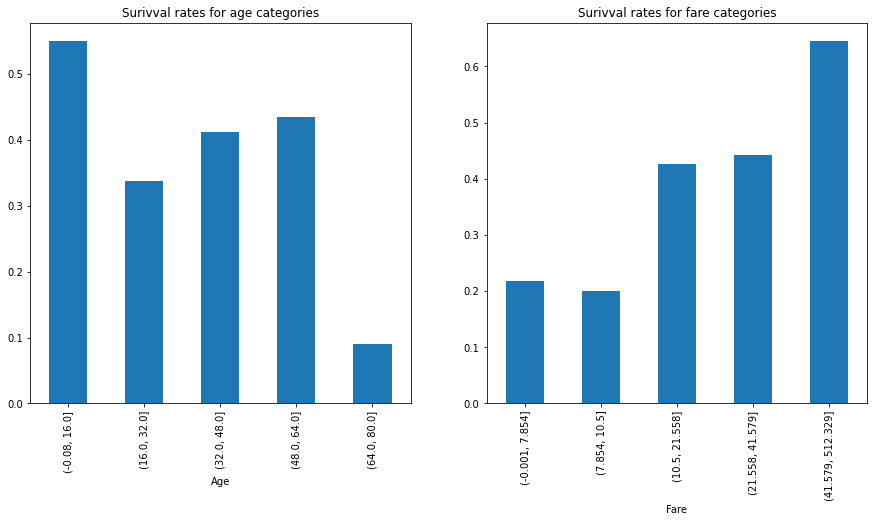

In [839]:
fig2, axs2 = plt.subplots(1,2)

df_all[['Age','Survived']].groupby('Age')['Survived'].mean().plot(ax=axs2[0], kind='bar', figsize=(15,7))
axs2[0].title.set_text('Surivval rates for age categories')

df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(ax=axs2[1], kind='bar', figsize=(15,7))
axs2[1].title.set_text('Surivval rates for fare categories')

### **3.2 Create new features out of existing variables**

#### **3.2.1 Family Size**

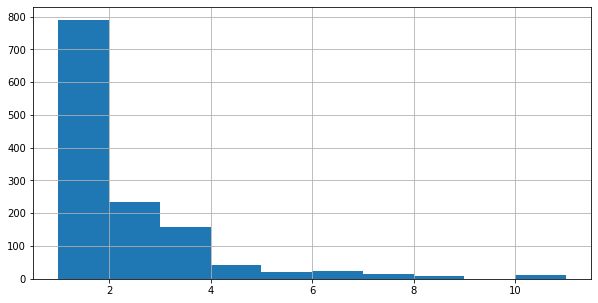

In [840]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].hist(figsize=(10,5))

In [841]:
df_all['Family_Size_bin'] = df_all['Family_Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))
df_all['Family_Size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_Size_bin, dtype: int64

Text(0.5, 0.98, 'Surivval rates for family size categories')

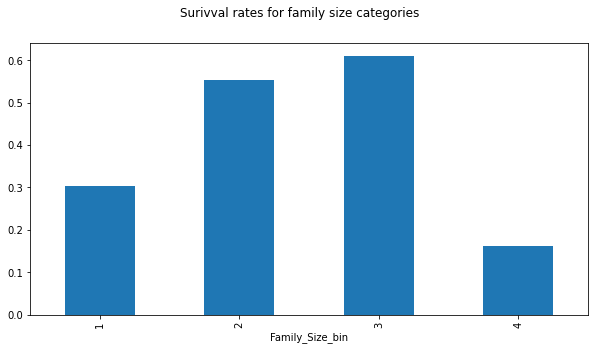

In [842]:
df_all[['Family_Size_bin','Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar', figsize=(10,5))
plt.suptitle('Surivval rates for family size categories')

#### **3.2.2 Tickets**

In [843]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

df_all[['Ticket_Frequency','Survived']].groupby('Ticket_Frequency').mean()

,Survived
Ticket_Frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


#### **3.2.3 Title**

In [844]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

df_all['Title'].nunique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


18

In [845]:
title_names = (df_all['Title'].value_counts() < 10)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_all.groupby('Title')['Title'].count()

Title
Master     61
Misc       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

#### **3.2.4 Survival rates**



In [846]:
import string
def extract_surname(data):
    families = []
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
    return families

df_all['Family'] = extract_surname(df_all['Name'])

df_all['Family'].nunique()

875

In [847]:
df_all[['Title','Survived','Family_Size']].groupby('Title').mean()

,Survived,Family_Size
Title,,
Master,0.575000,4.426230
Misc,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival rates grouped by families of women in dataset:


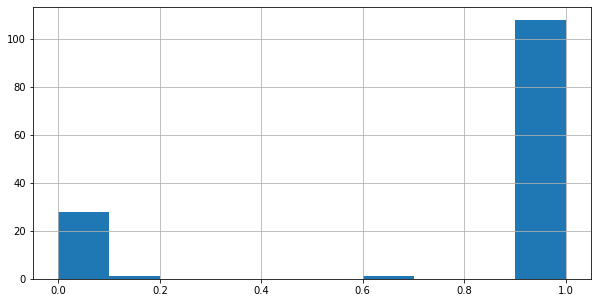

In [848]:
print("Survival rates grouped by families of women in dataset:")
df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(10,5))

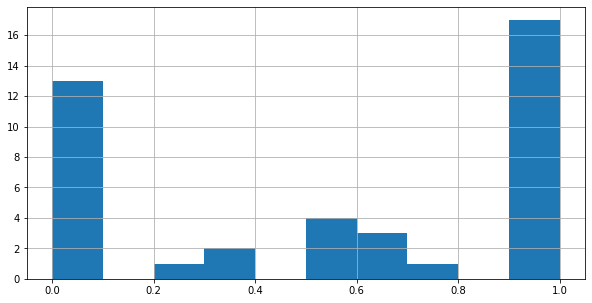

In [849]:
master_families = df_all.loc[df_all['Title'] == 'Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(10,5))

In [850]:
#Create variables with the survival rate of the women and masters

women_rate = df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean()
master_rate = df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

#Combine both series

combined_rate = women_rate.append(master_rate)

#It is possible that a women has the family as a master and vice versa, so duplicates have to been dropped
combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')
#Merge the new dataframe

df_all = pd.merge(df_all,combined_rate_df, how='left')

#We have calculated a survival rate for only a part of the cases, the other cases we set to 9 in the dummy variable
df_all['Survival_quota_NA'] = 1

df_all.loc[df_all['Survival_quota'].isnull(), 'Survival_quota_NA'] = 0

df_all['Survival_quota'] = df_all['Survival_quota'].fillna(0)

### **3.3 Label- and One Hot Encoding**

In [851]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Age', 'Fare', 'Deck']

for feature in non_numeric_features:
    df_all[feature] = LabelEncoder().fit_transform(df_all[feature])

cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family_Size_bin','Age','Fare']
encoded_features = []

for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1, 1)).toarray()
    n = df_all[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_all.index
    encoded_features.append(encoded_df)

df_all = pd.concat([df_all, *encoded_features], axis=1)

In [852]:
df_train, df_test = divide_df(df_all)

## **4. Modeling and Prediction**

In [857]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Define columns which can be dropped for the modelling part because we created new label and one hot encoded variants out of them
drop_cols = ['Embarked', 'Family', 'Family_Size', 'Survived', 'Family_Size_bin', 'Deck', 'Age', 
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

drop_cols_2 = ['Embarked', 'Family', 'Family_Size', 'Family_Size_bin', 'Deck', 'Fare',
               'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

#standardization of the variables
X = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values

X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))

#creating train, test splits
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)

display(np.any(np.isnan(X_train)))
display(np.all(np.isfinite(X_train)))

np.savetxt('X_train.csv', X_train, delimiter=',')

#defining model parameters
model = RandomForestClassifier(criterion='gini',
                            n_estimators=1750,
                            max_depth=7,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1,
                            verbose=1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(model.score(X_test1, y_test1))

output = pd.DataFrame({'Passengerld': test_data.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('2826_84_89_bd_final_v3.csv', index=False)

False

True

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1750,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished


0.8654708520179372
